In [1]:
import requests

url_get = requests.get('https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31')

In [2]:
url_get.content[1:777]

b'\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>Released between 2019-01-01 and 2019-12-31\n(Sorted by Popularity Ascending) - IMDb</title>\n  <script>(function(t'

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [4]:
print(soup.prettify()[:1045])

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///?src=mdot" name="apple-itunes-app"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   Released between 2019-01-01 and 2019-12-31
(Sorted by Popularity Ascending) - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   if (typeof uex == 'functi

In [5]:
table = soup.find_all('div', attrs={'class':'lister-item-content'})
table

[<div class="lister-item-content">
 <h3 class="lister-item-header">
 <span class="lister-item-index unbold text-primary">1.</span>
 <a href="/title/tt7767422/">Sex Education</a>
 <span class="lister-item-year text-muted unbold">(2019– )</span>
 </h3>
 <p class="text-muted">
 <span class="runtime">45 min</span>
 <span class="ghost">|</span>
 <span class="genre">
 Comedy, Drama            </span>
 </p>
 <div class="ratings-bar">
 <div class="inline-block ratings-imdb-rating" data-value="8.3" name="ir">
 <span class="global-sprite rating-star imdb-rating"></span>
 <strong>8.3</strong>
 </div>
 <div class="inline-block ratings-user-rating">
 <span class="userRatingValue" data-tconst="tt7767422" id="urv_tt7767422">
 <span class="global-sprite rating-star no-rating"></span>
 <span class="rate" data-no-rating="Rate this" data-value="0" name="ur">Rate this</span>
 </span>
 <div class="starBarWidget" id="sb_tt7767422">
 <div class="rating rating-list" data-auth="" data-ga-identifier="" data-sta

In [6]:
judul =table[0].find('h3',attrs={'class':'lister-item-header'})
judul2=judul.find('a').text
judul2

'Sex Education'

In [7]:
votes1 = table[0].find('p', attrs={'class':'sort-num_votes-visible'})
votes2 = votes1.find('span', attrs={'name':'nv'}).text
votes2

'102,179'

In [8]:
meta = table[1].find('span', attrs={'class':'metascore favorable'}).text
meta

'78        '

In [9]:
rating = table[0].find('div', attrs={'class':'inline-block ratings-imdb-rating'})
rating = rating.find('strong', attrs={'':''}).text

rating

'8.3'

In [10]:
temp = [] #initiating a tuple

for i in range(0, len(table)):
    judul =table[i].find('h3',attrs={'class':'lister-item-header'})
    judul2=judul.find('a').text

    votes1 = table[i].find('p', attrs={'class':'sort-num_votes-visible'})
    votes2 = votes1.find('span', attrs={'name':'nv'}).text

    if(table[i].find('span', attrs={'class':'metascore favorable'}) is None): 
        meta = 0 
    else : 
        meta = table[i].find('span', attrs={'class':'metascore favorable'}).text.strip()

    rating = table[i].find('div', attrs={'class':'inline-block ratings-imdb-rating'})
    rating = rating.find('strong', attrs={'':''}).text

        
    temp.append((judul2,votes2,meta,rating)) 
    
temp

[('Sex Education', '102,179', 0, '8.3'),
 ('1917', '132,812', '78', '8.5'),
 ('The Witcher', '207,917', 0, '8.4'),
 ('Gisaengchung', '185,212', '96', '8.6'),
 ('Once Upon a Time ...in Hollywood', '362,310', '83', '7.7'),
 ('Joker', '648,482', 0, '8.6'),
 ('The Gentlemen', '20,487', 0, '8.1'),
 ('Jojo Rabbit', '74,135', 0, '8.0'),
 ('Little Women', '43,131', '91', '8.1'),
 ('The Mandalorian', '127,764', 0, '8.8'),
 ('Knives Out', '139,360', '82', '8.0'),
 ('Star Wars: Episode IX - The Rise of Skywalker', '246,755', 0, '6.9'),
 ('The Irishman', '223,946', '94', '8.0'),
 ('Terminator: Dark Fate', '84,578', 0, '6.3'),
 ('Marriage Story', '150,635', '93', '8.1'),
 ('Bombshell', '24,606', '64', '6.8'),
 ('Uncut Gems', '55,393', '90', '7.9'),
 ('The Lighthouse', '62,139', '84', '7.8'),
 ('Doctor Sleep', '62,303', 0, '7.5'),
 ('The Last Full Measure', '1,418', 0, '6.4'),
 ('Midsommar', '109,812', '72', '7.2'),
 ('Color Out of Space', '3,941', '70', '6.3'),
 ('Just Mercy', '8,259', '68', '7.5')

In [11]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('Title','Vote','Metascore','Rating' ))
df.tail()

,Title,Vote,Metascore,Rating
45,Gemini Man,"50,655",0,5.7
46,Jay and Silent Bob Reboot,"8,150",0,5.8
47,Ad Astra,"136,079",80,6.6
48,Waves,"5,105",80,7.7
49,Playing with Fire,"4,323",0,4.8


In [12]:
df.dtypes

Title        object
Vote         object
Metascore    object
Rating       object
dtype: object

In [13]:
df['Vote'] = df['Vote'].str.replace(",","")
df['Vote'] = df['Vote'].astype('float64')

In [14]:
df['Metascore'] = df['Metascore'].astype('float64')

In [15]:
df['Rating'] = df['Rating'].astype('float64')

In [16]:
df.dtypes

Title         object
Vote         float64
Metascore    float64
Rating       float64
dtype: object

In [17]:
df.sort_values(by='Vote', ascending =False).head()

,Title,Vote,Metascore,Rating
35,Avengers: Endgame,658113.0,78.0,8.5
5,Joker,648482.0,0.0,8.6
4,Once Upon a Time ...in Hollywood,362310.0,83.0,7.7
11,Star Wars: Episode IX - The Rise of Skywalker,246755.0,0.0,6.9
12,The Irishman,223946.0,94.0,8.0


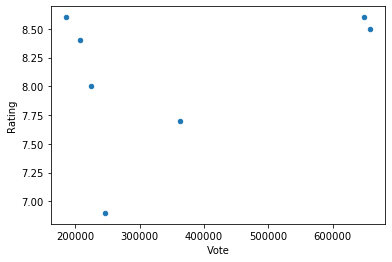

In [18]:
df.sort_values(by='Vote', ascending =False).head(7).plot(kind = 'scatter', x = 'Vote', y = 'Rating')